In [13]:
#Movie review sentiment analysis

#Loading the Dataset
import pandas as pd
data = pd.read_csv('IMDB Dataset.csv')
data.head(5)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


sentiment
negative    25000
positive    25000
dtype: int64


<AxesSubplot:title={'center':'Plot of Sentiments'}>

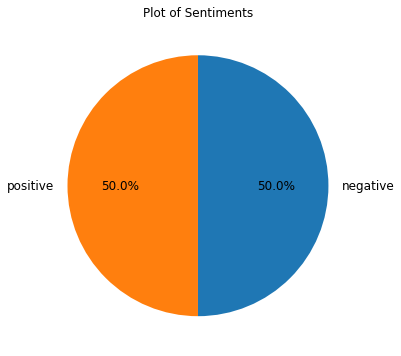

In [17]:
#Pre-Prcoessing and Bag of Word Vectorization using Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(data['review'])

import matplotlib.pyplot as plt
# Let's count the number of tweets by sentiments
sentiment_counts = data.groupby(['sentiment']).size()
print(sentiment_counts)

# Let's visualize the sentiments
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
plt.title("Plot of Sentiments")
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")


In [3]:
#Splitting the data into trainig and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, data['sentiment'], test_size=0.2, random_state=5)

#Training the model
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

#Caluclating the accuracy score of the model
from sklearn import metrics
predicted = MNB.predict(X_test)

accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracuy Score: ",accuracy_score)


Accuracuy Score:  0.8604
